<h1>Introduction</h1>
<p>Hello all! In this notebook I'm going to analyze different products data and implement multiple 
    Machine Learning algorithms to predict the Demand of each Product</p>
<h3>My main objectives on this project are:</h3>   
<ul>
    <li>Applying exploratory data analysis and trying to get some insights about our dataset</li>
    <li>Getting data in better shape by transforming and feature engineering to help us in building better models</li>
    <li>Building and tuning different models to get some stable results on predicting Demand</li>
</ul>

<h2>Importing Libraries</h2>
<p>Lets start by importing some packages we are going to need</p>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from sklearn.linear_model import LinearRegression

<h2>Meeting the data</h2>
<p>Lets open the data and see what we have</p>

In [2]:
#Opening the data
originalTrain = pd.read_csv("./train.csv")
originalTest = pd.read_csv("./test.csv")

In [3]:
#Lets see the shapes of the data so we know what we are dealing with
originalTrain.shape, originalTest.shape

((7560, 12), (1080, 12))

<p>We can see that we have 7560 rows on the train dataframe, and 1080 rows on the test dataframe, both with 12 columns.

With that information, we can already calculate the distribution of train - test data:
percentage_train_rows = 7560*100/(7560+1080) = 87.5%
percentage_test_rows = 100% - 87.5% = 12.5%
7/8 of the dataset belongs to train data and the remaining 1/8 belongs to test data

Now lets observe some of their elements</p>

In [4]:
originalTrain.head()

id      date    city       lat      long       pop    shop        brand  \
0  0.0  31/01/12  Athens  37.97945  23.71622  672130.0  shop_1  kinder-cola   
1  1.0  31/01/12  Athens  37.97945  23.71622  672130.0  shop_1  kinder-cola   
2  2.0  31/01/12  Athens  37.97945  23.71622  672130.0  shop_1  kinder-cola   
3  3.0  31/01/12  Athens  37.97945  23.71622  672130.0  shop_1   adult-cola   
4  4.0  31/01/12  Athens  37.97945  23.71622  672130.0  shop_1   adult-cola   

  container capacity  price  quantity  
0     glass    500ml   0.96   13280.0  
1   plastic    1.5lt   2.86    6727.0  
2       can    330ml   0.87    9848.0  
3     glass    500ml   1.00   20050.0  
4       can    330ml   0.39   25696.0

In [5]:
originalTest.head()

id      date    city       lat      long     pop    shop         brand  \
0  6480  31/01/18  Athens  37.97945  23.71622  664046  shop_1   kinder-cola   
1  6481  31/01/18  Athens  37.97945  23.71622  664046  shop_1   kinder-cola   
2  6482  31/01/18  Athens  37.97945  23.71622  664046  shop_1    adult-cola   
3  6483  31/01/18  Athens  37.97945  23.71622  664046  shop_1  orange-power   
4  6484  31/01/18  Athens  37.97945  23.71622  664046  shop_1  orange-power   

  container capacity  price  quantity  
0   plastic    1.5lt   3.10      7056  
1       can    330ml   0.85     12490  
2     glass    500ml   0.83     26640  
3     glass    500ml   0.54     41892  
4   plastic    1.5lt   0.83     22923

In [6]:
originalTrain.describe()

id          lat         long            pop        price  \
count  6480.000000  6429.000000  6434.000000    6480.000000  6480.000000   
mean   3239.500000    38.301238    23.270246  355141.416667     1.188981   
std    1870.759204     1.649771     1.086960  232828.796289     0.814567   
min       0.000000    35.327870    21.734440  134219.000000     0.110000   
25%    1619.750000    37.962450    22.417610  141439.750000     0.610000   
50%    3239.500000    38.244440    22.930860  257501.500000     0.920000   
75%    4859.250000    39.636890    23.716220  665871.000000     1.500000   
max    6479.000000    40.643610    25.143410  672130.000000     4.540000   

            quantity  
count    6480.000000  
mean    29431.855093  
std     17901.328301  
min      2953.000000  
25%     16441.750000  
50%     25184.000000  
75%     37866.000000  
max    145287.000000

In [7]:
originalTest.describe()

id          lat         long            pop        price  \
count  1080.00000  1072.000000  1067.000000    1080.000000  1080.000000   
mean   7019.50000    38.298228    23.269862  355370.166667     1.238454   
std     311.91345     1.655656     1.088977  230207.452873     0.829449   
min    6480.00000    35.327870    21.734440  137154.000000     0.230000   
25%    6749.75000    37.962450    22.417610  144651.000000     0.650000   
50%    7019.50000    38.244440    22.930860  261162.000000     0.980000   
75%    7289.25000    39.636890    23.716220  664046.000000     1.555000   
max    7559.00000    40.643610    25.143410  664046.000000     4.790000   

            quantity  
count    1080.000000  
mean    29360.875926  
std     16182.538761  
min      3523.000000  
25%     17229.750000  
50%     26010.500000  
75%     37421.750000  
max    116612.000000

<li>Id column looks useless, so we can safely drop it from both. I'm going to save our target (quantity) on a different variable so we can use it in future.</li>
<li>Lets first make a copy of the dataframes so we can keep the originals intact</li>

In [8]:
train = originalTrain.copy()
test = originalTest.copy()

#Dropping unnecessary Id column.

train.drop('id', axis=1, inplace=True)
test.drop('id', axis=1, inplace=True)

#Dropping rows without quantity or date

train['quantity'].dropna(inplace=True)
test['quantity'].dropna(inplace=True)
train['date'].dropna(inplace=True)
test['date'].dropna(inplace=True)

#Backing up target variables and dropping them from train data.
y_train = train['quantity']
X_train = train
train = X_train.drop(['quantity'], axis=1)
y_test = test['quantity']
X_test = test
test = X_test.drop(['quantity'], axis=1)

#Dropping rows without date
#train['date'].dropna(inplace=True)
#test['date'].dropna(inplace=True)

In [9]:
train['date']

0       31/01/12
1       31/01/12
2       31/01/12
3       31/01/12
4       31/01/12
          ...   
7555         NaN
7556         NaN
7557         NaN
7558         NaN
7559         NaN
Name: date, Length: 7560, dtype: object

In [10]:
train['date']

0       31/01/12
1       31/01/12
2       31/01/12
3       31/01/12
4       31/01/12
          ...   
7555         NaN
7556         NaN
7557         NaN
7558         NaN
7559         NaN
Name: date, Length: 7560, dtype: object

<h2>EDA</h2>
<p>Exploratory Data Analysis</p>

<p>We're going to start with basic correlation table here. I dropped the top part since it's just mirror of the other part below. With this table we can understand some linear relations between different features.</p>

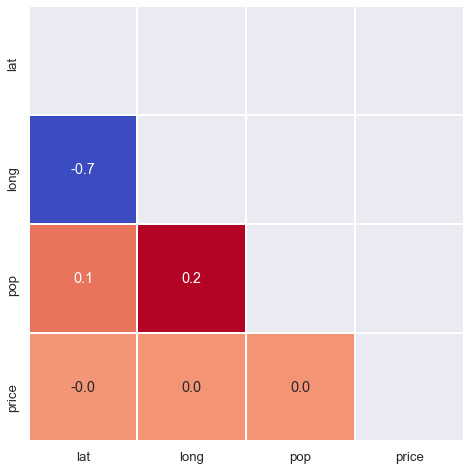

In [11]:
# Display numerical correlations between features.

sns.set(font_scale=1.2)
correlation_train = train.corr()
mask = np.triu(correlation_train.corr())
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_train,
            annot=True,
            fmt='.1f',
            cmap='coolwarm',
            square=True,
            mask=mask,
            linewidths=1,
            cbar=False)

plt.show()

<h4>Observations</h4>
<li>We can see there's a negative correlation between quantity and price,
indicating, that quantity tends to get lower as price increases </li>

<h2>Missing Data</h2>
<p>Steps:</p>
<ol>
    <li>Merge the datasets here before we start editing it so we don't have to do these operations twice.</li>
    <li>Detect missing values and visualize them</li>
    <li>Get rid of them for the next steps of our work</li>
</ol>

In [12]:
#features = pd.concat([X_train, X_test]).reset_index(drop=True)
#Lets see the new shape of the features dataframe
#print(features.shape)

In [13]:
"""def missing_percentage(df):
    
    #Defining a function for returning missing ratios
    
    total = df.isnull().sum().sort_values(
        ascending=False)[df.isnull().sum().sort_values(ascending=False) != 0]
    percent = (df.isnull().sum().sort_values(ascending=False) / len(df) *
              100)[(df.isnull().sum().sort_values(ascending=False) / len(df) *
                   100) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    """

"def missing_percentage(df):\n    \n    #Defining a function for returning missing ratios\n    \n    total = df.isnull().sum().sort_values(\n        ascending=False)[df.isnull().sum().sort_values(ascending=False) != 0]\n    percent = (df.isnull().sum().sort_values(ascending=False) / len(df) *\n              100)[(df.isnull().sum().sort_values(ascending=False) / len(df) *\n                   100) != 0]\n    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])\n    "

In [14]:
# Checking 'NaN' values.
"""
missing = missing_percentage(features)

fig, ax = plt.subplots(figsize=(20, 5))
sns.barplot(x=missing.index, y='Percent', data=missing, palette='Reds_r')
plt.xticks(rotation=90)

display(missing.T.style.background_gradient(cmap='Reds', axis=1))
"""

"\nmissing = missing_percentage(features)\n\nfig, ax = plt.subplots(figsize=(20, 5))\nsns.barplot(x=missing.index, y='Percent', data=missing, palette='Reds_r')\nplt.xticks(rotation=90)\n\ndisplay(missing.T.style.background_gradient(cmap='Reds', axis=1))\n"

<h2>Pipeline</h2>
<p>Steps:</p>
<ol>
    <li>Extract year, month and day from date so we can use them as numerical features</li>
    <li>Add Year, Month and Day columns to the dataset</li>
    <li>Eliminate date column from the dataset</li>
    <li>
        <ol>
            <li>Fill long, lat, price and pop columns with their mean values</li>
            <li>Fill capacity, brand, shop, container, city, year, month, day with their most-repeated values</li>
        </ol>
    </li>
    <li>One Hot Encode capacity, brand, shop, container, city, year, month and day</li>
    <li>Fit the model</li>
</ol>

In [15]:
#Import neccesary packages to create the pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

In [16]:
#Import the BaseEstimator
from sklearn.base import BaseEstimator

#Define the class dateProcessor
#Custom transformer must have methods fit and transform
class DateProcessor(BaseEstimator):

    def __init__(self):
        pass

    def fit(self, documents, y=None):
        return self

    def transform(self, df):
        df['date'] = pd.to_datetime(df['date'], errors="ignore")
        df['date'].dropna(inplace=True)
        #format="%d%m%Y",errors="ignore"
        df['day'] = df['date'].dt.day
        df['month'] = df['date'].dt.month
        df['year'] = df['date'].dt.year
        
        return df

In [26]:
imputer = SimpleImputer(strategy="mean")
imputer2 = SimpleImputer(strategy="most_frequent")
pre_process = ColumnTransformer(remainder='drop',
                                transformers=[('drop_columns', 'drop', ['date']),
                                              ('imputeWithMean', imputer, ['long',
                                                                             'lat',
                                                                             'price',
                                                                             'pop']),
                                              ('imputeWithMostRepeated', imputer2, ['capacity',
                                                                                  'brand',
                                                                                  'shop',
                                                                                  'container',
                                                                                  'city',
                                                                                  'year',
                                                                                  'month',
                                                                                  'day']),
                                              ('oneHotEncode', OneHotEncoder(), ['capacity',
                                                                                  'brand',
                                                                                  'shop',
                                                                                  'container',
                                                                                  'city',
                                                                                  'year',
                                                                                  'month',
                                                                                  'day'])
                                             ])

In [27]:
train.dropna(inplace=True)

In [28]:
model_pipeline = Pipeline(steps=[('processDate', DateProcessor()),
                                ('pre_processing', pre_process),
                                ('linear_regression', LinearRegression())
                                ])
model_pipeline.fit(train, y_train)

#Predict target values on the training data
predictions = model_pipeline.predict(train)

ValueError: could not convert string to float: '500ml'

In [23]:
train.dropna()

date          city       lat      long       pop    shop  \
0    2012-01-31        Athens  37.97945  23.71622  672130.0  shop_1   
1    2012-01-31        Athens  37.97945  23.71622  672130.0  shop_1   
2    2012-01-31        Athens  37.97945  23.71622  672130.0  shop_1   
3    2012-01-31        Athens  37.97945  23.71622  672130.0  shop_1   
4    2012-01-31        Athens  37.97945  23.71622  672130.0  shop_1   
...         ...           ...       ...       ...       ...     ...   
6475 2017-12-31        Athens  37.96245  23.68708  665871.0  shop_3   
6476 2017-12-31        Larisa  39.63689  22.41761  144302.0  shop_5   
6477 2017-12-31         Patra  38.24444  21.73444  168501.0  shop_6   
6478 2017-12-31  Thessaloniki  40.64361  22.93086  353001.0  shop_4   
6479 2017-12-31  Thessaloniki  40.64361  22.93086  353001.0  shop_4   

             brand container capacity  price   day  month    year  
0      kinder-cola     glass    500ml   0.96  31.0    1.0  2012.0  
1      kinder-cola   plastic    1.5lt   2.86  31.0    1.0  2012.0  
2      kinder-cola       can    330ml   0.87  31.0    1.0  2012.0  
3       adult-cola     glass    500ml   1.00  31.0    1.0  2012.0  
4       adult-cola       can    330ml   0.39  31.0    1.0  2012.0  
...            ...       ...      ...    ...   ...    ...     ...  
6475  orange-power   plastic    1.5lt   1.02  31.0   12.0  2017.0  
6476  orange-power       can    330ml   0.47  31.0   12.0  2017.0  
6477    adult-cola     glass    500ml   1.02  31.0   12.0  2017.0  
6478        gazoza   plastic    1.5lt   1.34  31.0   12.0  2017.0  
6479    adult-cola     glass    500ml   1.16  31.0   12.0  2017.0  

[6376 rows x 13 columns]